In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
data = pd.read_csv('datasets/MarketSalary.csv',header=0)
data.keys()

Index(['Designation', 'College', 'Degree', 'Years of Experience',
       'Industry Domain', 'Prev Salary(PM)', 'Prev Designation', 'Salary(PM)'],
      dtype='object')

<strong> Analysing all data

In [63]:
# If not removed, The output will be incorrect
data["College"]=data["College"].str.strip()
data["College"].value_counts()

abc    20
def    18
xyz    12
Name: College, dtype: int64

In [64]:
#data["Prev Designation"].str.strip()
data["Prev Designation"].value_counts()

Junior Engineer    34
Senior Engineer    15
Manager             1
Name: Prev Designation, dtype: int64

In [65]:
data["Designation"]=data["Designation"].str.strip()
data["Designation"].value_counts()


Senior Engineer    24
Manager            16
Junior Engineer    10
Name: Designation, dtype: int64

In [66]:
data["Degree"].value_counts()

B.E       35
B.Arch    15
Name: Degree, dtype: int64

In [67]:
data["Industry Domain"].value_counts()

IT       28
Infra    22
Name: Industry Domain, dtype: int64

In [68]:
data["Years of Experience"].value_counts()

3     12
4      9
1      8
2      7
5      4
7      3
9      2
6      2
10     1
8      1
0      1
Name: Years of Experience, dtype: int64

In [69]:
data["Prev Salary(PM)"].value_counts()

20000     12
40000      8
10000      8
25000      5
15000      2
50000      2
30000      2
1000       1
200000     1
35000      1
8000       1
80000      1
17000      1
47000      1
100000     1
45000      1
90000      1
23000      1
Name: Prev Salary(PM), dtype: int64

In [70]:
data["Salary(PM)"].value_counts()

20000     5
30000     5
50000     3
70000     3
67000     2
75000     2
120000    2
18000     1
300000    1
54102     1
45123     1
76543     1
60765     1
85000     1
45000     1
90000     1
72450     1
59876     1
69000     1
40100     1
134000    1
65790     1
66789     1
110000    1
97000     1
96874     1
27500     1
60000     1
89900     1
56000     1
10000     1
500       1
500857    1
21500     1
40000     1
Name: Salary(PM), dtype: int64

In [71]:
#Converting College feature string values to one_hot_encoded values
temp = pd.get_dummies(data["College"])
data = data.drop("College",axis=1)
data = data.join(temp)


In [72]:
data.head(5)

,Designation,Degree,Years of Experience,Industry Domain,Prev Salary(PM),Prev Designation,Salary(PM),abc,def,xyz
0,Junior Engineer,B.E,0,IT,10000,Junior Engineer,20000,1,0,0
1,Senior Engineer,B.E,3,IT,30000,Junior Engineer,40000,0,0,1
2,Senior Engineer,B.Arch,2,IT,40000,Junior Engineer,50000,0,1,0
3,Manager,B.E,3,Infra,80000,Senior Engineer,120000,1,0,0
4,Senior Engineer,B.E,2,IT,25000,Junior Engineer,18000,0,0,1


In [73]:
temp = pd.get_dummies(data["Industry Domain"])
data = data.drop("Industry Domain",axis=1)
data = data.join(temp)


In [74]:
data.head(5)

,Designation,Degree,Years of Experience,Prev Salary(PM),Prev Designation,Salary(PM),abc,def,xyz,IT,Infra
0,Junior Engineer,B.E,0,10000,Junior Engineer,20000,1,0,0,1,0
1,Senior Engineer,B.E,3,30000,Junior Engineer,40000,0,0,1,1,0
2,Senior Engineer,B.Arch,2,40000,Junior Engineer,50000,0,1,0,1,0
3,Manager,B.E,3,80000,Senior Engineer,120000,1,0,0,0,1
4,Senior Engineer,B.E,2,25000,Junior Engineer,18000,0,0,1,1,0


In [75]:
temp = pd.get_dummies(data["Prev Designation"])
data = data.drop("Prev Designation",axis=1)
data = data.join(temp)
data

,Designation,Degree,Years of Experience,Prev Salary(PM),Salary(PM),abc,def,xyz,IT,Infra,Junior Engineer,Manager,Senior Engineer
0,Junior Engineer,B.E,0,10000,20000,1,0,0,1,0,1,0,0
1,Senior Engineer,B.E,3,30000,40000,0,0,1,1,0,1,0,0
2,Senior Engineer,B.Arch,2,40000,50000,0,1,0,1,0,1,0,0
3,Manager,B.E,3,80000,120000,1,0,0,0,1,0,0,1
4,Senior Engineer,B.E,2,25000,18000,0,0,1,1,0,1,0,0
5,Manager,B.E,3,25000,40100,0,1,0,0,1,0,0,1
6,Senior Engineer,B.Arch,5,50000,70000,1,0,0,1,0,1,0,0
7,Manager,B.E,4,20000,30000,0,1,0,0,1,0,1,0
8,Junior Engineer,B.E,1,20000,50000,0,0,1,1,0,1,0,0
9,Manager,B.E,4,25000,30000,0,0,1,0,1,0,0,1


<h3> As we have dropped the Previous Designation colomn, We will add 'current' to our Designation colomn to avoid confusion

In [76]:
data["Designation"]="current "+ data["Designation"]
data.head(5)

,Designation,Degree,Years of Experience,Prev Salary(PM),Salary(PM),abc,def,xyz,IT,Infra,Junior Engineer,Manager,Senior Engineer
0,current Junior Engineer,B.E,0,10000,20000,1,0,0,1,0,1,0,0
1,current Senior Engineer,B.E,3,30000,40000,0,0,1,1,0,1,0,0
2,current Senior Engineer,B.Arch,2,40000,50000,0,1,0,1,0,1,0,0
3,current Manager,B.E,3,80000,120000,1,0,0,0,1,0,0,1
4,current Senior Engineer,B.E,2,25000,18000,0,0,1,1,0,1,0,0


In [77]:
data['Designation'].value_counts()

current Senior Engineer    24
current Manager            16
current Junior Engineer    10
Name: Designation, dtype: int64

In [78]:
#repeat same step for Designation
temp = pd.get_dummies(data['Designation'])
data = data.drop('Designation',axis = 1)

In [79]:
data = data.join(temp)
data.sample(4)

,Degree,Years of Experience,Prev Salary(PM),Salary(PM),abc,def,xyz,IT,Infra,Junior Engineer,Manager,Senior Engineer,current Junior Engineer,current Manager,current Senior Engineer
44,B.E,10,45000,75000,1,0,0,0,1,1,0,0,0,0,1
34,B.E,3,20000,96874,0,1,0,0,1,1,0,0,1,0,0
28,B.E,5,20000,54102,1,0,0,1,0,1,0,0,0,0,1
6,B.Arch,5,50000,70000,1,0,0,1,0,1,0,0,0,0,1


In [80]:
temp = pd.get_dummies(data["Degree"])
data = data.drop("Degree",axis=1)
data = data.join(temp)
data

,Years of Experience,Prev Salary(PM),Salary(PM),abc,def,xyz,IT,Infra,Junior Engineer,Manager,Senior Engineer,current Junior Engineer,current Manager,current Senior Engineer,B.Arch,B.E
0,0,10000,20000,1,0,0,1,0,1,0,0,1,0,0,0,1
1,3,30000,40000,0,0,1,1,0,1,0,0,0,0,1,0,1
2,2,40000,50000,0,1,0,1,0,1,0,0,0,0,1,1,0
3,3,80000,120000,1,0,0,0,1,0,0,1,0,1,0,0,1
4,2,25000,18000,0,0,1,1,0,1,0,0,0,0,1,0,1
5,3,25000,40100,0,1,0,0,1,0,0,1,0,1,0,0,1
6,5,50000,70000,1,0,0,1,0,1,0,0,0,0,1,1,0
7,4,20000,30000,0,1,0,0,1,0,1,0,0,1,0,0,1
8,1,20000,50000,0,0,1,1,0,1,0,0,1,0,0,0,1
9,4,25000,30000,0,0,1,0,1,0,0,1,0,1,0,0,1


In [81]:
#Assigning Labels to Y and feature vectors to X
y = data["Salary(PM)"]
x = data.drop("Salary(PM)",axis=1)
x.head(5)

,Years of Experience,Prev Salary(PM),abc,def,xyz,IT,Infra,Junior Engineer,Manager,Senior Engineer,current Junior Engineer,current Manager,current Senior Engineer,B.Arch,B.E
0,0,10000,1,0,0,1,0,1,0,0,1,0,0,0,1
1,3,30000,0,0,1,1,0,1,0,0,0,0,1,0,1
2,2,40000,0,1,0,1,0,1,0,0,0,0,1,1,0
3,3,80000,1,0,0,0,1,0,0,1,0,1,0,0,1
4,2,25000,0,0,1,1,0,1,0,0,0,0,1,0,1


In [82]:
y.head(5)

0     20000
1     40000
2     50000
3    120000
4     18000
Name: Salary(PM), dtype: int64

<h2> As every colomn has been converted to indivisual colomns, we can check shapes of data sets and start feeding it to CART-Regressor 

In [83]:
print(str(x.shape) + "\n" + str(y.shape))

(50, 15)
(50,)


In [84]:
#SPLIT THE DATA INTO TRAINING AND TESTING DATA
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=4)

In [85]:
rmse_list=[]
for i in range(1,15):
    dt=DTR(max_depth=i)
    dt.fit(X_train,y_train)
    y_pred=dt.predict(X_test)
    rmse_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))
print(rmse_list)    

[115739.39628378053, 116093.16545423196, 110543.42261288947, 108762.60047511727, 111531.73001540173, 113466.50251117312, 112280.20906221839, 110946.4176607902, 110458.60888292048, 113584.40036752407, 109307.44958418891, 110212.96427870907, 110821.01801824417, 111024.48169030108]


In [86]:
min(rmse_list)

108762.60047511727

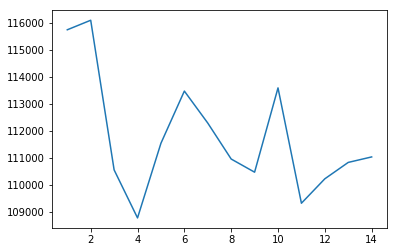

In [87]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(1,15),rmse_list)

In [88]:
dt=DTR(max_depth=3)
dt.fit(x,y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [89]:
from sklearn import tree
import pydotplus
from IPython.display import Image

dot_data = tree.export_graphviz(dt,out_file=None)
graph = pydotplus.graphviz.graph_from_dot_data(dot_data)
Image(graph.create_png())
graph.write_png('salary_tree.png')

True